In [17]:
import networkit as nk
import numpy as np
from tqdm import tqdm

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt


In [3]:
g = generators.HyperbolicGenerator(1e5).generate()

In [4]:
overview(g)

Network Properties:
nodes, edges			100000, 298325
directed?			False
weighted?			False
isolated nodes			1786
self-loops			0
density				0.000060
clustering coefficient		0.717288
min/max/avg degree		0, 649, 5.966500
degree assortativity		0.001870
number of connected components	4205
size of largest component	26386 (26.39 %)


In [8]:
communities = community.detectCommunities(g, inspect=True)

Communities detected in 0.07074 [s]
solution properties:
-------------------  -------------
# communities        4401
min community size      1
max community size   1260
avg. community size    22.7221
imbalance              54.7826
edge cut              892
edge cut (portion)      0.00299003
modularity              0.992043
-------------------  -------------


/opt/homebrew/anaconda3/lib/python3.9/site-packages/networkit/stopwatch.py:49: UserWarning: networkit.Timer is deprecated, will be removed in future updates.
  warn("networkit.Timer is deprecated, will be removed in future updates.")


In [34]:
import networkit as nk
import numpy as np

In [23]:
n = 1e6
mu = 4
p = mu/n
g = nk.generators.ErdosRenyiGenerator(nNodes = n, prob=p).generate()

In [24]:
overview(g)

Network Properties:
nodes, edges			1000000, 2001174
directed?			False
weighted?			False
isolated nodes			18233
self-loops			0
density				0.000004
clustering coefficient		0.000002
min/max/avg degree		0, 17, 4.002348
degree assortativity		-0.000056
number of connected components	18965
size of largest component	980241 (98.02 %)


In [54]:
from tqdm import tqdm

n = 5e7
mu = 4
p = mu/n

number_c4s = []

InteractiveShell.ast_node_interactivity = "last"

for _ in tqdm(range(25)):

    g = nk.generators.ErdosRenyiGenerator(nNodes = n, prob=p).generate()

    cc = nk.components.ConnectedComponents(g)
    cc.run()
#     print("number of components ", cc.numberOfComponents())
    v = 0
#     print("component of node ", v , ": " , cc.componentOfNode(0))
    comp_id_to_size = cc.getComponentSizes()
    counts = {}
    for c_id, size in comp_id_to_size.items():
        try:
            counts[size] += 1
        except KeyError:
            counts[size] = 1
            
#     print(f'number of CC size 4: {counts[4]}')
    number_c4s.append(counts[4])
    
    
e = np.e
p4 = e**(-4*mu) * mu**3 * (1/6 + 2*1/2 + 1)
print(f' predicted number: p4/4 * n = {p4/4 * n}')
print(np.mean(number_c4s))

100%|████████████████████████████████████████████████████████████| 25/25 [08:49<00:00, 21.16s/it]

 predicted number: p4/4 * n = 195.06096951338267
237.64


(array([1., 1., 2., 5., 5., 6., 4., 0., 0., 1.]),
 array([194. , 203.5, 213. , 222.5, 232. , 241.5, 251. , 260.5, 270. ,
        279.5, 289. ]),
 <BarContainer object of 10 artists>)

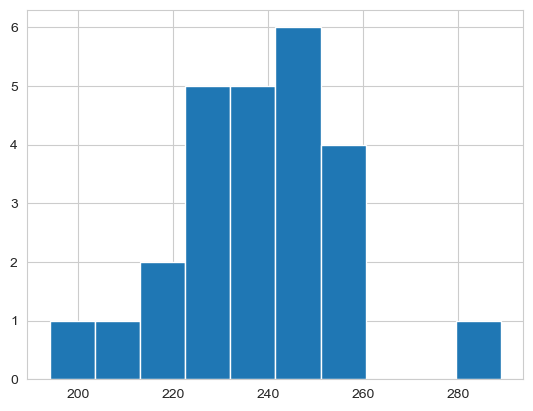

In [55]:
plt.hist(number_c4s)

In [58]:
e**(-4*mu) * mu**3 * (2 + 2/3) * n/4

240.0750394010863

In [60]:
e**(-4*mu) * mu**3 * (2 + 1/6) * n/4

195.06096951338262

In [61]:
from tqdm import tqdm

n = 1e6
mu = 4
p = mu/n

number_c4s = []

InteractiveShell.ast_node_interactivity = "last"

for _ in tqdm(range(25)):

    g = nk.generators.ErdosRenyiGenerator(nNodes = n, prob=p).generate()

    cc = nk.components.ConnectedComponents(g)
    cc.run()
#     print("number of components ", cc.numberOfComponents())
    v = 0
#     print("component of node ", v , ": " , cc.componentOfNode(0))
    comp_id_to_size = cc.getComponentSizes()
    counts = {}
    for c_id, size in comp_id_to_size.items():
        try:
            counts[size] += 1
        except KeyError:
            counts[size] = 1
            
#     print(f'number of CC size 4: {counts[4]}')
    number_c4s.append(counts[4])
    
    
e = np.e
p4 = e**(-4*mu) * mu**3 * (1/6 + 2*1/2 + 1)
print(f' predicted number: p4/4 * n = {p4/4 * n}')
print(np.mean(number_c4s))

100%|████████████████████████████████████████████████████████████| 25/25 [00:06<00:00,  3.97it/s]

 predicted number: p4/4 * n = 3.9012193902676535
6.04


## Investigating average distance within giant component of Erdos Renyi graph

In [29]:
InteractiveShell.ast_node_interactivity = "last"


In [34]:
np.arange(1, 20, 3)

array([ 1,  4,  7, 10, 13, 16, 19])

In [50]:

n = 1e5
mu = 4
p = mu/n

g = nk.generators.ErdosRenyiGenerator(nNodes = n, prob=p).generate()

cc = nk.components.ConnectedComponents(g)
cc.run()

giant_cc = cc.getComponents()[0]

print(f'size giant_cc: {len(giant_cc)}')

dists = []
bfs_num_nodes = []
for _ in tqdm(range(20)):
    a, b = np.random.choice(giant_cc, 2)
    biBFS = nk.distance.BidirectionalBFS(g, a, b)
    _ = biBFS.run()
    dists.append(biBFS.getDistance())

    bfs = nk.distance.BFS(g, a, storePaths=True, storeNodesSortedByDistance=True, target=b)
    _ = bfs.run()
    bfs_num_nodes.append(len(bfs.getNodesSortedByDistance()))


# dists are of order log(n)
print(np.mean(dists))
print(np.log(n))

# This is approx half of n
print(np.mean(bfs_num_nodes))
print(n)

size giant_cc: 97981


100%|████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 84.28it/s]

8.3
11.512925464970229
43564.95
100000.0


In [51]:
biBFS = nk.distance.BidirectionalBFS(g, a, b)
biBFS.run()

In [12]:
biBFS.getHops()

/var/folders/60/0t2c_bns6n3c7kjhdk4d4wk80000gn/T/ipykernel_31280/416298567.py:1: UserWarning: getHops() is deprecated, use 'getDistance' instead
  biBFS.getHops()


9.0